<a href="https://colab.research.google.com/github/reachananya/Covid-Outbreak-analysis/blob/main/Covid_19_Outbreak_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID-19 Outbreak Analysis

This is the source code for the map to be created. 

In [16]:
# Download data
!git clone https://github.com/CSSEGISandData/COVID-19.git

fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [17]:
# Install 'geocoder'
!pip install geocoder

In [18]:

# Importing modules
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime 
import geocoder
import folium
from folium import plugins 

In [19]:
# DataFrame for the world
conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
conf_df = pd.read_csv(conf_csv)
grouped_conf_df = conf_df.groupby(by = ['Country/Region'], as_index = False).sum()

In [20]:
# DataFrame for India
india_df = pd.read_csv("https://api.covid19india.org/csv/latest/state_wise.csv")
india_df = india_df.iloc[1:36, :]
state_latitudes = []
state_longitudes = []
for i in india_df.index:
    state = india_df['State'][i]
    state_lat = geocoder.osm(state).lat
    state_lng = geocoder.osm(state).lng
    state_latitudes.append(state_lat)
    state_longitudes.append(state_lng)

state_latitudes = pd.Series(data = state_latitudes, index = india_df.index)
state_longitudes = pd.Series(data = state_longitudes, index = india_df.index)
india_df['Latitude'] = state_latitudes
india_df['Longitude'] = state_longitudes

In [21]:
# state_coordinates = [(19.7515, 75.7139), # Maharashtra
#                     (11.1271, 78.6569), # Tamil Nadu
#                     (15.9129, 79.7400), # Andhra Pradesh
#                     (15.317, 75.7139), # Karnataka
#                     (28.7041, 77.1025), # Delhi
#                     (26.8467, 80.9462), # UP
#                     (22.9868, 87.8550), # WB
#                     (25.0961, 85.3131), # Bihar
#                     (18.1124, 79.0193), # Telangana
#                     (22.2587, 71.1924), # Gujarat
#                     (26.2006, 92.9376), # Assam
#                     (27.0238, 74.2179), # Rajasthan
#                     (20.9517, 85.0985), # Odisha
#                     (29.0588, 76.0856), # Haryana
#                     (22.9734, 78.6569), # Madhya Pradesh
#                     (10.8505, 76.2711), # Kerala
#                     (31.1471, 75.3412), # Punjab
#                     (33.7782, 76.5762), # Jammu and Kashmir
#                     (23.6102, 85.2799), # Jharkhand
#                     (21.2787, 81.8661), # Chattisgarh
#                     (30.0668, 79.0193), # Uttarakhand
#                     (15.2993, 74.1240), # Goa
#                     (23.9408, 91.9882), # Tripura
#                     (11.9416, 79.8083), # Puducherry
#                     (24.6637, 93.9063), # Manipur
#                     (31.1048, 77.1734), # Himachal Pradesh
#                     (26.1584, 94.5624), # Nagaland
#                     (28.2180, 94.7278), # Arunachal Pradesh
#                     (11.7401, 92.6586), # Andaman and Nicobar
#                     (34.1700, 77.5800), # Ladakh
#                     (30.7333, 76.7794), # Chandigarh
#                     (20.1809, 73.0169), # Dadra and Nagar Haveli
#                     (25.4670, 91.3662), # Meghalaya
#                     (27.5330, 88.5122), # Sikkim
#                     (23.1645, 92.9376), # Mizoram
#                      ]
                  
# ind_state_lat = pd.Series([s[0] for s in state_coordinates], index = india_df.index)
# ind_state_lng = pd.Series([s[1] for s in state_coordinates], index = india_df.index)

# india_df['Latitude'] = ind_state_lat
# india_df['Longitude'] = ind_state_lng

# DataFrame for the US
us_conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_conf_df = pd.read_csv(us_conf_csv)
us_conf_df = us_conf_df.dropna()
grouped_us_conf_df = us_conf_df.groupby(by = ['Combined_Key'], as_index = False).sum()

In [22]:
# Function to get total confirmed cases in a country
def get_total_confirmed_cases_for_country(country_name):
    total_cases_country = conf_df[conf_df['Country/Region'] == country_name].iloc[:, 4:].apply(sum, axis = 0)
    total_cases_country.index = pd.to_datetime(total_cases_country.index)
    return total_cases_country

In [23]:
# Function to get total confirmed cases in the world
def get_total_confirmed_global_cases():
    global_cases = conf_df.iloc[:, 4:].apply(sum, axis=0)
    global_cases.index = pd.to_datetime(global_cases.index)
    return global_cases

In [24]:
# Function to create a line plot
def line_plot(your_name, plot_background, fig_width, fig_height, country_name, colour, linewidth, markertype):
    dt_series = None
    if country_name != 'global':
        dt_series = get_total_confirmed_cases_for_country(country_name)
    else:
        dt_series = get_total_confirmed_global_cases()
    plt.style.use(plot_background)
    plt.figure(figsize = (fig_width, fig_height))
    plt.title(f'{country_name.upper()}: Total Coronavirus Cases Reported', fontsize = 16)
    plt.plot(dt_series.index, dt_series, c = colour, lw = linewidth, marker = markertype, markersize = 7)
    plt.xticks(rotation = 45)
    plt.ylabel("Total Cases")
    plt.grid(linestyle='--', c='grey')
    plt.show()

In [25]:
# Add minimap
def add_minimap(map_name):
    # Plugin for mini map
    minimap = plugins.MiniMap(toggle_display = True)
    map_name.add_child(minimap) # Add minimap
    plugins.ScrollZoomToggler().add_to(map_name) # Add scroll zoom toggler to map
    plugins.Fullscreen(position='topright').add_to(map_name) # Add full screen button to map

In [26]:
# Add title to map
def add_title(map_name, country, your_name):
    title_html = '''
        <h2 align="center" style="font-size:20px"><b>Coronavirus Total Confirmed Cases in {}</b></h2>
             '''.format(country, your_name.upper())   
    return map_name.get_root().html.add_child(folium.Element(title_html))

In [27]:
# Function to create folium maps using for India, US and the world
def folium_map_with_circles(your_name, country, map_width, map_height, left_margin, top_margin, map_tile, zoom, circle_color, minimap):
    last_col = conf_df.columns[-1]
    if country == 'India':
        india_map = folium.Map(location = [22.3511148, 78.6677428], 
                               width = map_width, height = map_height,
                               left = f"{left_margin}%", top = f"{top_margin}%",
                               tiles = map_tile, zoom_start = zoom)
        
        if minimap == True:
            add_minimap(india_map)
    
        add_title(india_map, country, your_name)    
        for i in india_df.index:
            folium.Circle(radius = float(india_df.loc[i, 'Confirmed']) / 3,
                          location = [india_df.loc[i, 'Latitude'], india_df.loc[i, 'Longitude']],
                          popup = "{}\n {}\n on {}".format(india_df.loc[i, 'State'], 
                                                          india_df.loc[i, 'Confirmed'], 
                                                          india_df.loc[i, 'Last_Updated_Time']),
                          
                          color = circle_color,
                          fill = True).add_to(india_map)
        return india_map

    elif country == 'US':
        us_map = folium.Map(location = [39.381266, -97.922211], 
                            width = map_width, height = map_height, 
                            left = f"{left_margin}%", top = f"{top_margin}%",
                            tiles = map_tile, zoom_start = zoom)
        if minimap == True:
            add_minimap(us_map)
        
        add_title(us_map, country, your_name)
        for i in grouped_us_conf_df.index:
            folium.Circle(location = [grouped_us_conf_df.loc[i, 'Lat'], grouped_us_conf_df.loc[i, 'Long_']], 
                          radius = int(grouped_us_conf_df.loc[i, last_col]), 
                          popup = "{}\n {}\n on {}".format(grouped_us_conf_df.loc[i, 'Combined_Key'],
                                                          grouped_us_conf_df.loc[i, last_col],
                                                          last_col),
                          color = circle_color,
                          fill = True).add_to(us_map)
        return us_map
    
    elif country == 'World':
        world_map = folium.Map(location = [0, 0], 
                            width = map_width, height = map_height, 
                            left = f"{left_margin}%", top = f"{top_margin}%",
                            tiles = map_tile, zoom_start = zoom)
        if minimap == True:
            add_minimap(world_map)
        
        add_title(world_map, country, your_name)
        for i in grouped_conf_df.index:
            folium.Circle(location = [grouped_conf_df.loc[i, 'Lat'], grouped_conf_df.loc[i, 'Long']], 
                          radius = int(grouped_conf_df.loc[i, last_col]) / 2, 
                          popup = "{}\n {}\n on {}".format(grouped_conf_df.loc[i, 'Country/Region'],
                                                          grouped_conf_df.loc[i, last_col], 
                                                          last_col),
                          color = circle_color, 
                          fill = True).add_to(world_map)
        return world_map
    else:
        print("\nWrong input! Enter either India, US or World.\n")

In [28]:
# Total confirmed cases in the descending order.
grouped_conf_df = conf_df.groupby(by='Country/Region', as_index=False).sum()
desc_grp_conf_df = grouped_conf_df.sort_values(by=conf_df.columns[-1], ascending=False)

In [29]:
# Function to create a bar plot displaying the top 10 countries having the most number of coronavirus confirmed cases.
def bar_plot(your_name, num_countries, width, height):
    last_col = conf_df.columns[-1]
    latest_date = datetime.datetime.strptime(last_col, '%m/%d/%y').strftime('%B %d, %Y') # Modify the latest date in the 'Month DD, YYYY' format.
    plt.figure(figsize = (width, height))
    plt.title(f'Top {num_countries} Countries with Highest COVID-19 Confirmed Cases', fontsize = 16)
    sns.barplot(desc_grp_conf_df[last_col].head(num_countries), desc_grp_conf_df['Country/Region'].head(num_countries), orient = 'h')
    plt.xlabel(f'Total Confirmed Cases (in millions) as of {latest_date}')
    plt.show()

In [30]:
# Non-cumulative Confirmed Cases.
non_cum_conf_df = desc_grp_conf_df.iloc[:, :4]
for i in range(len(desc_grp_conf_df.columns[3:]) - 1):
    series = desc_grp_conf_df[desc_grp_conf_df.columns[3 + (i + 1) ]] - desc_grp_conf_df[desc_grp_conf_df.columns[3 + i]]
    non_cum_conf_df[desc_grp_conf_df.columns[3 + (i + 1)]] = series

In [31]:
# Function to get the total non-cumulative confirmed cases in a country.
def get_total_daily_confirmed_cases_for_country(country_name):
    total_daily_cases = non_cum_conf_df[non_cum_conf_df['Country/Region'] == country_name].iloc[:, 4:].apply(sum, axis = 0)
    total_daily_cases.index = pd.to_datetime(total_daily_cases.index)
    return total_daily_cases

In [32]:
# Line plot for the daily (non-cumulative) confirmed cases in various countries.
def daily_cases_line_plot(your_name, num_countries, width, height):
    plt.figure(figsize=(width, height))
    plt.title(f'Non-Cumulative COVID-19 Confirmed Cases', fontsize = 16)
    for region in non_cum_conf_df.iloc[:num_countries, :]['Country/Region']:
        total_conf_cases = get_total_daily_confirmed_cases_for_country(region)
        plt.plot(total_conf_cases.index[53:], total_conf_cases[53:], lw=2.5, label=region)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid('major', linestyle='--', c='grey')
    plt.show()

---

Line Plot

The line plot visualises the total number of confirmed cases in India till yesterday. For the line plot, the dataset that we have on coronavirus is maintained at Johns Hopkins University which gets according to the US time. 



In [33]:
# Student Action: Write conf_df[conf_df['Country/Region'] == 'India'] to view the dataset for India that will be used to create a line plot.
conf_df[conf_df['Country/Region'] == 'India'].loc[: , "11/12/20":]     #slicing ; loc[rows , columns]

,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,...,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21
147,8728795,8773479,8814579,8845127,8874290,8912907,8958483,9004365,9050597,9095806,9139865,9177840,9222216,9266705,9309787,9351109,9392919,9431691,9462809,9499413,9534964,9571559,9608211,9644222,9677203,9703770,9735850,9767371,9796744,9826775,9857029,9884100,9906165,9932547,9956557,9979447,10004599,10031223,10055560,10075116,...,26752447,26948874,27157795,27369093,27555457,27729247,27894800,28047534,28175044,28307832,28441986,28574350,28694879,28809339,28909975,28996473,29089069,29182532,29274823,29359155,29439989,29510410,29570881,29633105,29700313,29762793,29823546,29881772,29935221,29977861,30028709,30082778,30134445,30183143,30233183,30279331,30316897,30362848,30411634,30458251


So, in this dataset, we have data for the total confirmed cases in India starting from January 22, 2020. The date given here is in the `MM/DD/YY` format 


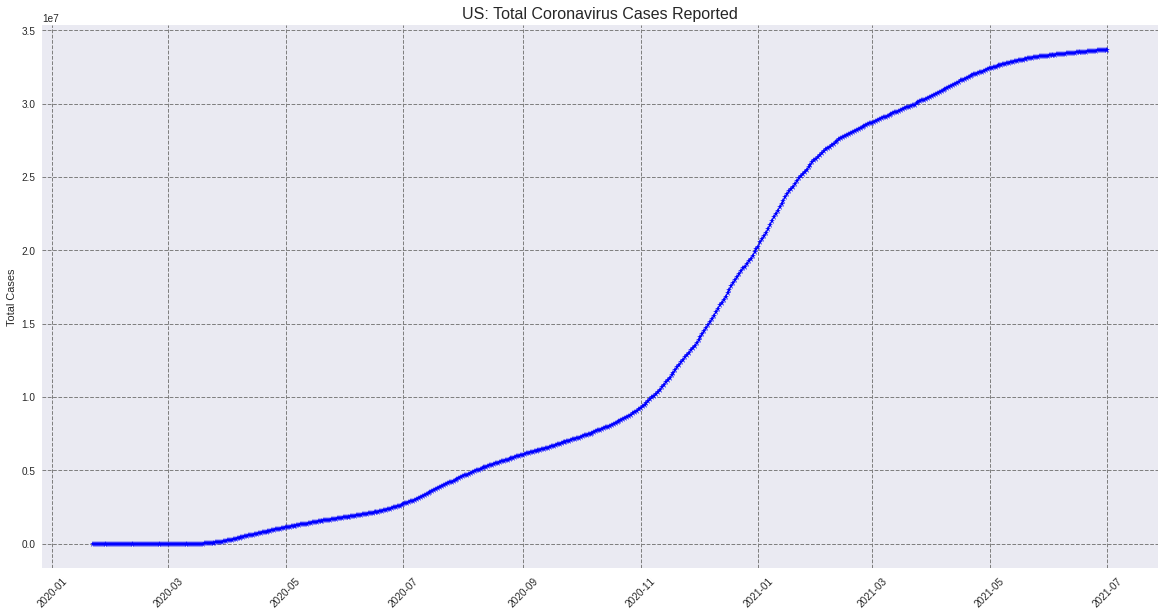

In [34]:
# Student Action: Create a line plot for the total confirmed cases in India using the 'line_plot()' function.
line_plot("Ananya", "seaborn", 20, 10, "US", "Blue", 1, "*")

creating a map for India to show the state-wise total confirmed cases of coronavirus. Using the latitude and longitude values (which are numeric values with decimal), I have also creted circular markers on a map, by using the `folium_map_with_circles()` function 

In [36]:
# Student Action: Create a map for India to show the state-wise total confirmed cases of coronavirus.
folium_map_with_circles("ananya", "India", 1000, 700, 1, 2, "Stamen Terrain", 4, "Red", True)